## 0. 設定

In [1]:
# Do not show warnings
import warnings
warnings.filterwarnings('ignore')

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib for japanese support
import japanize_matplotlib

# functions for data frame display
from IPython.display import display

# Adjust display options
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.rcParams["font.size"]=14
random_seed = 123

## 1. データ取得

In [2]:
# ダウンロード元URL
url = 'https://archive.ics.uci.edu/ml/\
machine-learning-databases/00275/\
Bike-Sharing-Dataset.zip'

# 公開データのダウンロードと解凍
!wget $url -O Bike-Sharing-Dataset.zip | tail -n 1
!unzip -o Bike-Sharing-Dataset.zip | tail -n 1
!head -5 day.csv

--2021-01-01 18:32:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 279992 (273K) [application/x-httpd-php]
`Bike-Sharing-Dataset.zip' に保存中

Bike-Sharing-Datase 100%[===================>] 273.43K  89.4KB/s    時間 3.1s    

2021-01-01 18:32:37 (89.4 KB/s) - `Bike-Sharing-Dataset.zip' へ保存完了 [279992/279992]

  inflating: hour.csv                
instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,

In [3]:
# day.csvをデータフレームに取り込み
# 日付を表す列はparse_datesで指定する
df = pd.read_csv('day.csv', parse_dates=[1])

# データ属性の確認
print(df.dtypes)

# instant は連番で予測で不要なので削除
df = df.drop('instant', axis=1)

# 項目名の日本語化

columns = [
    '日付',  '季節',  '年', '月', '祝日', '曜日', '勤務日', '天気', 
    '気温', '体感温度',  '湿度', '風速',
    '臨時ユーザー利用数', '登録ユーザー利用数', '全体ユーザー利用数'
]

# 項目名を日本語に置き換え
df.columns = columns

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


## 2. データの確認

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


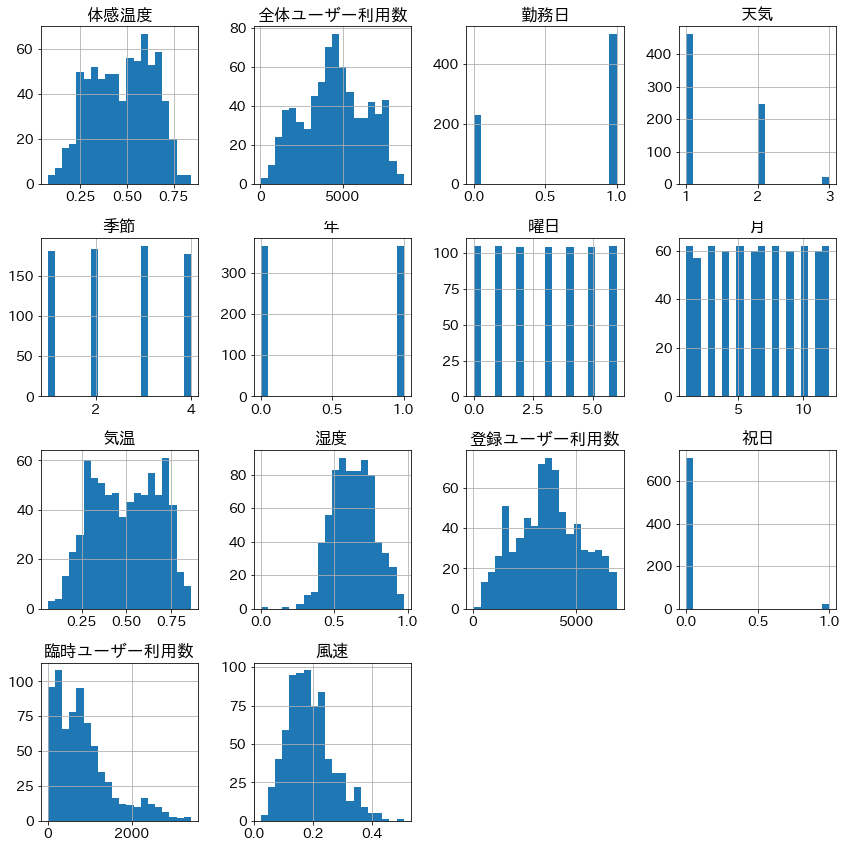

日付           0
季節           0
年            0
月            0
祝日           0
曜日           0
勤務日          0
天気           0
気温           0
体感温度         0
湿度           0
風速           0
臨時ユーザー利用数    0
登録ユーザー利用数    0
全体ユーザー利用数    0
dtype: int64

In [4]:
#########################################################################################
# 先頭5行の確認
display(df.head())

# 最終5行の確認
display(df.tail())

# 度数分布表示

# グラフのサイズ調整のためのおまじない
from pylab import rcParams
rcParams['figure.figsize'] = (12, 12)

# データフレームの数値項目でヒストグラム表示
df.hist(bins=20)
plt.tight_layout()
plt.show()

# 欠損値チェック
df.isnull().sum()

## 3. 時系列表示

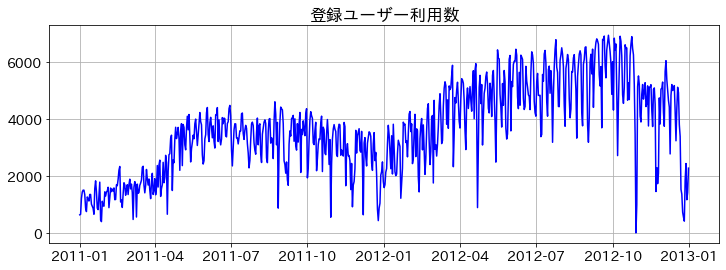

In [5]:
# 時系列グラフの描画 (登録利用者数)
plt.figure(figsize=(12,4))

# グラフ描画
plt.plot(df['日付'],df['登録ユーザー利用数'],c='b')

# 方眼表示など
plt.grid()
plt.title('登録ユーザー利用数')

# 画面出力
plt.show()

## 4. 前処理とアルゴリズム選択

In [6]:
# x, yへの分割
x = df.drop(['日付', '臨時ユーザー利用数', '登録ユーザー利用数',
    '全体ユーザー利用数'], axis=1)
y = df['登録ユーザー利用数'].values

# 分割日 mdayの設定
mday = pd.to_datetime('2012-11-1')

# 訓練用indexと検証用indexを作る
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

# 入力データの分割
x_train = x[train_index]
x_test = x[test_index]

# yも同様に分割
y_train = y[train_index]
y_test = y[test_index]

# 日付データの分割(グラフ表示用)
dates_test = df['日付'][test_index]

# 結果確認(サイズを確認)
print(x_train.shape)
print(x_test.shape)

# 結果確認 (境界値を重点的に)
display(x_train.tail())
display(x_test.head())

# 目的変数の分割結果確認
print(y_train[:10])


(670, 11)
(61, 11)


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
665,4,1,10,0,6,0,2,0.5300,0.5151,0.7200,0.2357
666,4,1,10,0,0,0,2,0.4775,0.4678,0.6946,0.3980
667,4,1,10,0,1,1,3,0.4400,0.4394,0.8800,0.3582
668,4,1,10,0,2,1,2,0.3182,0.3099,0.8255,0.2130
669,4,1,10,0,3,1,2,0.3575,0.3611,0.6667,0.1667


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
670,4,1,11,0,4,1,2,0.3658,0.3699,0.5817,0.1573
671,4,1,11,0,5,1,1,0.3550,0.3560,0.5221,0.2662
672,4,1,11,0,6,0,2,0.3433,0.3238,0.4913,0.2705
673,4,1,11,0,0,0,1,0.3258,0.3295,0.5329,0.1791
674,4,1,11,0,1,1,1,0.3192,0.3081,0.4942,0.2363


[ 654  670 1229 1454 1518 1518 1362  891  768 1280]


## 5. アルゴリズムの適用と評価

[4927.806  4889.2686 3571.434  3637.8308 4719.999 ]
score: 0.4206  r2_ score: 0.4206


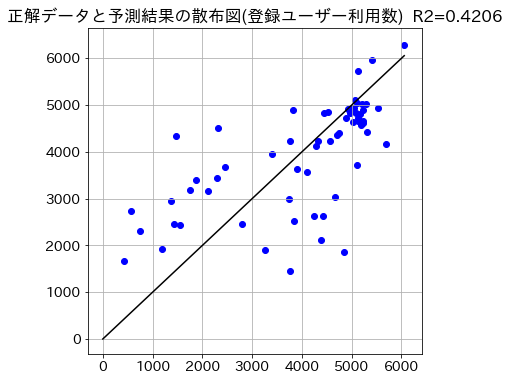

In [7]:
# アルゴリズム選定
# XGBRegressorを選定する
from xgboost import XGBRegressor
algorithm = XGBRegressor(objective ='reg:squarederror',
                         random_state=random_seed)

# 学習
algorithm.fit(x_train, y_train)

# 予測
y_pred = algorithm.predict(x_test)

# 予測結果確認
print(y_pred[:5])

# score関数の呼び出し
score = algorithm.score(x_test, y_test)

# R2値の計算
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

# 結果確認
print(f'score: {score:.4f}  r2_ score: {r2_score:.4f}')

#正解データと予測結果を散布図で比較 (登録ユーザー利用数)
plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0,y_max), (0, y_max), c='k')
plt.scatter(y_test, y_pred, c='b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数)\
  R2={score:.4f}')
plt.grid()
plt.show()

## 6. 時系列表示

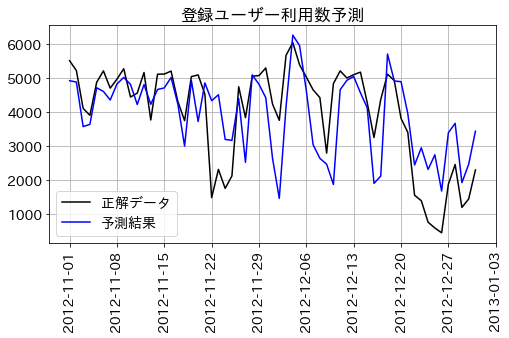

In [8]:
# 時系列グラフの描画 (登録ユーザー利用数)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# グラフ描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果', c='b')

# 日付目盛間隔
# 木曜日ごとに日付を表示
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測')

# 画面出力
plt.show()

## 7. チューニング

,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1,月_2,月_3,月_4,月_5,月_6,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.3442,0.3636,0.8058,0.1604,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,2,0.3635,0.3537,0.6961,0.2485,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0.1964,0.1894,0.4373,0.2483,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,2,1,1,0.2000,0.2121,0.5904,0.1603,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,1,0.2270,0.2293,0.4370,0.1869,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


[4654.571  4324.7354 3174.4817 3028.7585 4276.959 ]
score: 0.5099


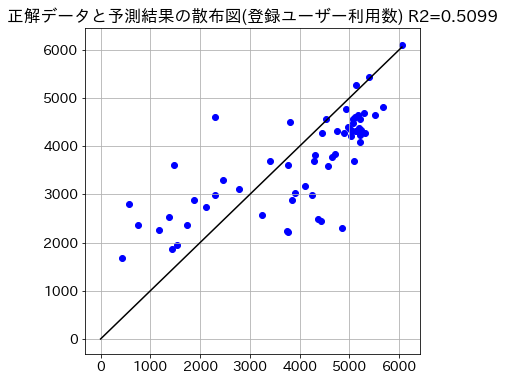

In [9]:
# 項目をone hot encodeするための関数
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df.drop([column],axis=1),df_dummy],axis=1)
    return df

# 項目「月」「季節」をone hot encodingする

x2 = x.copy()
x2 = enc(x2, '月')
x2 = enc(x2, '季節')

# 結果確認
display(x2.head())



# 登録利用者モデル(チューニング後)

# mdayを基準に入力データを分割
x2_train = x2[train_index]
x2_test = x2[test_index]

#　アルゴリズム選定
algorithm2 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 学習
algorithm2.fit(x2_train, y_train)

# 予測
y_pred2 = algorithm2.predict(x2_test)

# 予測結果確認
print(y_pred2[:5])

# 評価(登録利用者) (チューニング後)

# score関数の呼び出し
score2 = algorithm2.score(x2_test, y_test)

# 結果確認
print(f'score: {score2:.4f}')

#正解データと予測結果を散布図で比較 (登録利用者)
plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0,y_max), (0, y_max), c='k')
plt.scatter(y_test, y_pred2, c='b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数) R2={score2:.4f}')
plt.grid()
plt.show()

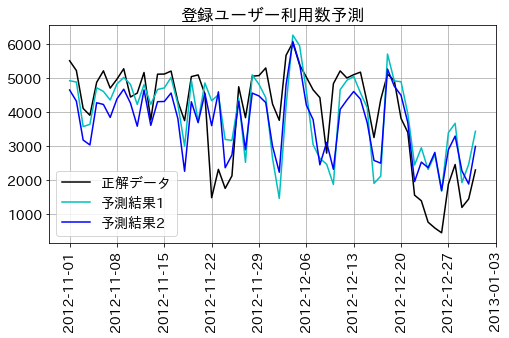

In [10]:
# 時系列グラフの描画 (チューニング後 登録ユーザー利用数)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# グラフ描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果1', c='c')
ax.plot(dates_test, y_pred2, label='予測結果2', c='b')

# 日付目盛間隔
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日付書式
ax.tick_params(axis='x', rotation=90)

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測')

# 画面出力
plt.show()


## 8. 重要度分析

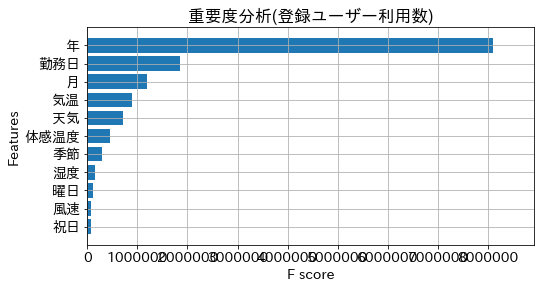

In [11]:
# 登録ユーザー利用数に対する重要度分析
import xgboost as xgb
fig, ax = plt.subplots(figsize=(8, 4))
xgb.plot_importance(algorithm, ax=ax, height=0.8,
    importance_type='gain', show_values=False,
    title='重要度分析(登録ユーザー利用数)')
plt.show()